In [1]:
import numpy as np
import math
import operator
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# a point class which stores the velocity field at each point on the meshgrid
# since we are considering potential flow (i.e inviscid flow), the velocity at a given point is the sum of its contributing velocities 

class Point(object):
    
    def __init__ (self, x, y, strength):
    
        self.x = x
        self.y = y
        self.strength = strength
        
    def get_velocity(self):
        
        u = np.array((self.strength)/(2 * math.pi) * (X - self.x)/ ((X - self.x)**2 + (Y - self.y)**2))
        v = np.array((self.strength) / (2 * math.pi) * (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        
        return u, v
    
    def superimpose(self, point_2):
        
        superimpose = tuple(map(operator.add, self.get_velocity(), point_2.get_velocity()))
        
        return superimpose
    
    def coordinates(self, point_2):
        
        x = (self.x, point_2.x)
        y = (self.y, point_2.y)
        
        return x,y
    
    def draw(self, point_2):
    
        superimpose = self.superimpose(point_2) 
        coordinates = self.coordinates(point_2)
        
        width = 10.0
        height = (y_end-y_start) / (x_end-x_start) * width
        plt.figure(figsize = (width,height))
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)

        plt.xlim(x_start,x_end)
        plt.ylim(y_start, y_end)

        plt.streamplot(X, Y, superimpose[0], superimpose[1] , density = 2, linewidth = 2, arrowsize = 2, arrowstyle = '->')
        plt.scatter(coordinates[0], coordinates[1], s=5, color = '#CD2305', marker = 'o')
        

In [3]:
# the case of flow without a source/sink or vortex term, free flowing fluid where the velocity field is constant with time
class FreeStream:
    
    def __init__ (self, u_inf):
        
        self.u_inf = u_inf
        
    def velocity(self):
    
        u = self.u_inf * np.ones((N, N), dtype=float)
        v = np.zeros((N, N), dtype=float)
        
        return (u,v)

In [4]:
# a class for the case where a source & sink are brough arbitrarily closer to each other
# describes a vortex in the context of potential flow

class Doublet(object):
    
    def __init__ (self, x, y, strength):
    
        self.x = x
        self.y = y
        self.strength = strength
        
    def get_velocity(self):
        
        u = np.array((-self.strength)/(2 * math.pi) * ((X - self.x)**2 - (Y - self.y)**2)/ (((X - self.x)**2 + (Y - self.y)**2))**2)

        v = np.array((-self.strength)/(2 * math.pi) * ( 2*(X - self.x)*(Y - self.y) )/ (((X - self.x)**2 + (Y - self.y)**2))**2)
        
        return u, v
    
    def superimpose(self, point_2):
        
        superimpose = tuple(map(operator.add, self.get_velocity(), point_2.get_velocity()))
        
        return superimpose
    
    def coordinates(self, point_2):
        
        x = (self.x, point_2.x)
        y = (self.y, point_2.y)
        
        return x,y
    
    def draw(self, point_2):
    
        superimpose = self.superimpose(point_2)
        
        coordinates = self.coordinates(point_2)
        
        width = 10.0
        height = (y_end-y_start) / (x_end-x_start) * width
        plt.figure(figsize = (width,height))
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)

        plt.xlim(x_start,x_end)
        plt.ylim(y_start, y_end)

        plt.streamplot(X, Y, superimpose[0], superimpose[1] , density = 2, linewidth = 2, arrowsize = 2, arrowstyle = '->')
        plt.scatter(coordinates[0], coordinates[1], s=30, color = '#CD2305', marker = 'o')

In [5]:
sigma = np.loadtxt('NACA0012_sigma.txt')
x_source = np.loadtxt('NACA0012_x.txt')
y_source = np.loadtxt('NACA0012_y.txt')

x_source

OSError: NACA0012_sigma.txt not found.

NameError: name 'x_source' is not defined

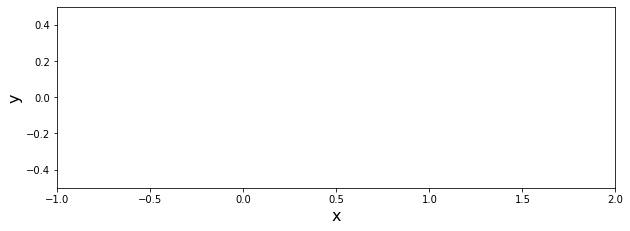

In [6]:
N = 50

x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

X, Y = np.meshgrid(x,y)


width = 10.0
height = (y_end-y_start) / (x_end-x_start) * width
plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)

plt.xlim(x_start,x_end)
plt.ylim(y_start, y_end)


v = (0,0)

for i in range(1,len(x_source)):
    
    v = tuple(map(operator.add, v , Doublet(x_source[i], y_source[i], sigma[i]).get_velocity()))
    
plt.streamplot(X, Y, v[0]+1.5, v[1], density = 2, linewidth = 2, arrowsize = 2, arrowstyle = '->')
plt.plot(x_source, y_source, color = '#CD2305', marker = 'o')